# Support Vector Regression, SKLearn

[Dataset](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data?resource=download)

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

### Importing Dataset

Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [5]:
data = pd.read_csv('../Datasets/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
X = data.iloc[:,:13]
y = data.iloc[:,13]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


# Visualizing Data and Identifying key features

<function matplotlib.pyplot.show(close=None, block=None)>

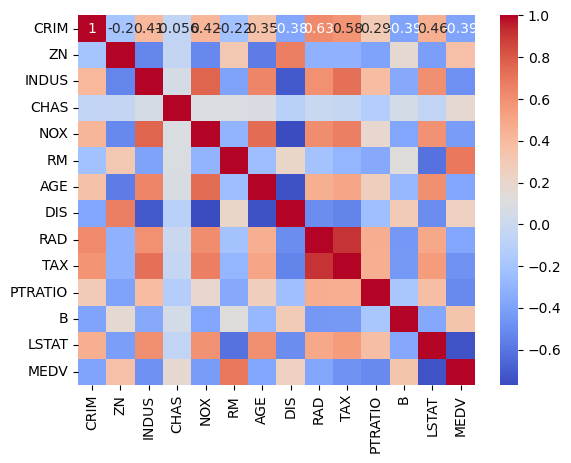

In [11]:
# Correlation Heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show

In [19]:
# Find pairs with high correlation
pairs = np.where(corr > 0.6)

for pair in zip(*pairs):
    if pair[0] < pair[1]:  # Ignore diagonal elements
        corr_value = round(corr.iloc[pair[0], pair[1]], 3) 
        print(f"{corr.columns[pair[0]]} and {corr.columns[pair[1]]} have a correlation of {corr_value}")

CRIM and RAD have a correlation of 0.626
ZN and DIS have a correlation of 0.664
INDUS and NOX have a correlation of 0.764
INDUS and AGE have a correlation of 0.645
INDUS and TAX have a correlation of 0.721
INDUS and LSTAT have a correlation of 0.604
NOX and AGE have a correlation of 0.731
NOX and RAD have a correlation of 0.611
NOX and TAX have a correlation of 0.668
RM and MEDV have a correlation of 0.695
AGE and LSTAT have a correlation of 0.602
RAD and TAX have a correlation of 0.91


## Train Test Split

In [20]:
sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y.values.reshape(-1,1)) #reshaping since y is a 1D array, and sc expects a 2D array

In [21]:
X_train, X_test, y_train, y_test = tts(scaled_X, scaled_y, test_size=0.2, random_state=42)

## Training

In [28]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel()) #ravel() converts 2D array to 1D array

SVR()

In [29]:
y_pred=regressor.predict(X_test)
r2_score(y_pred, y_test)

0.7392254527509285